In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dicionário de dados

Order ID: Unique identifier for each sales order.

Date:Date of the sales transaction.

Category:Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).

Product Name:Specific name or model of the product sold.

Quantity:Number of units of the product sold in the transaction.

Unit Price:Price of one unit of the product.

Total Price: Total revenue generated from the sales transaction (Quantity * Unit Price).

Region:Geographic region where the transaction occurred (e.g., North America, Europe, Asia).

Payment Method: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

Fonte da base de dados:

https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data/data

Objetivo do projeto:

Encontrar tendencias e insights

In [2]:
df = pd.read_csv('Online_Sales_Data.csv')

In [3]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.describe(include = object)

,Date,Product Category,Product Name,Region,Payment Method
count,240,240,240,240,240
unique,240,6,232,3,3
top,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,North America,Credit Card
freq,1,40,2,80,120


In [6]:
df.describe().drop(columns = ['Transaction ID'])

,Units Sold,Unit Price,Total Revenue
count,240.000000,240.000000,240.000000
mean,2.158333,236.395583,335.699375
std,1.322454,429.446695,485.804469
min,1.000000,6.500000,6.500000
25%,1.000000,29.500000,62.965000
50%,2.000000,89.990000,179.970000
75%,3.000000,249.990000,399.225000
max,10.000000,3899.990000,3899.990000


In [7]:
df.shape

(240, 9)

In [8]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [9]:
# Observando os valores distintos das categorias de produto.

df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [10]:
# Observando os valores distintos de produtos.

qtd_produtos = df['Product Name'].unique()

In [11]:
i = 0
for produtos in qtd_produtos:
    i += 1
print('A quantidade de produtos distindos é {}'.format(i))    

A quantidade de produtos distindos é 232


In [12]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [13]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [14]:
df['Product Category'].value_counts()

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

In [15]:
df['Region'].value_counts()

Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64

In [16]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

In [18]:
total_vendido_por_categoria = df.groupby('Product Category')['Units Sold'].sum().reset_index()

In [19]:
total_vendido_por_categoria

,Product Category,Units Sold
0,Beauty Products,46
1,Books,114
2,Clothing,145
3,Electronics,66
4,Home Appliances,59
5,Sports,88


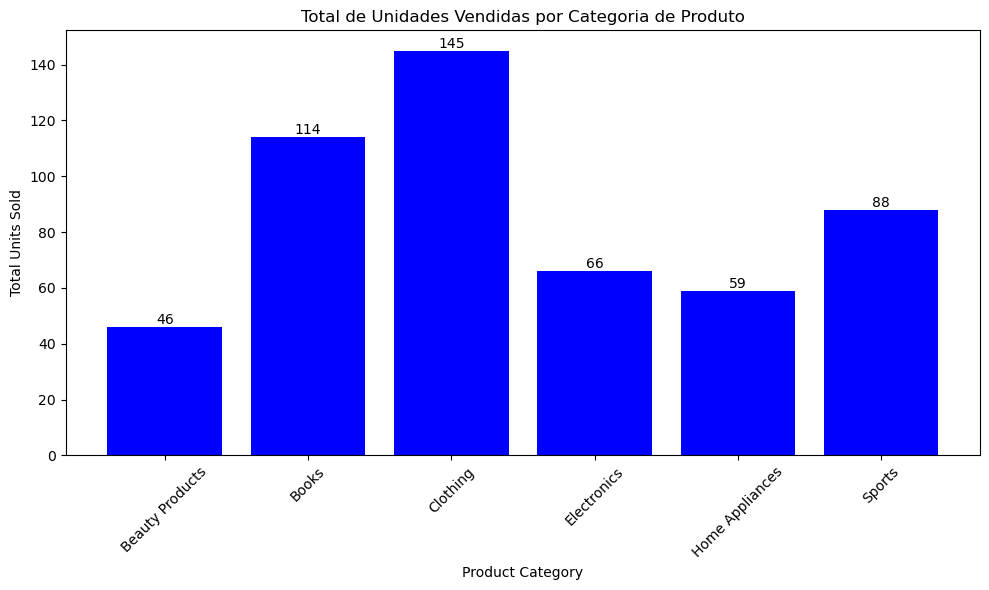

In [24]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_vendido_por_categoria['Product Category'], total_vendido_por_categoria['Units Sold'], color='blue')

# Adicionando rótulos de dados nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Configurando os rótulos e o título
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Unidades Vendidas')
plt.title('Total de Unidades Vendidas por Categoria de Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()